In [11]:
using HDF5, FFTW
using PyPlot

In [12]:
nome="/home/karel/RGutWork/JLDFiles/19115s1cut_single_event.h5"

"/home/karel/RGutWork/JLDFiles/19115s1cut_single_event.h5"

In [6]:
datos=h5open(nome)

HDF5 data file: /home/karel/RGutWork/JLDFiles/19115s1cut_single_event.h5

In [7]:
names(datos)

7-element Array{String,1}:
 "CanalesSaturados"
 "Canalesrespuesta"
 "KTT_KInv"        
 "LFPSaturados"    
 "Nota"            
 "freq"            
 "kCSDCorrecta"    

In [8]:
lfp=read(datos["LFPSaturados"]);

In [9]:
buenos=read(datos["Canalesrespuesta"]);
freq=read(datos["freq"])

7.022058198545425

In [13]:
buenos[7,:]

2-element Array{Int64,1}:
 57
 23

In [14]:
exemplo=lfp[57,23,:];

In [15]:
figura=figure(figsize=(8,4))
ylim(-1000,500)
grid()
plot(rangotiempo,exemplo)

UndefVarError: UndefVarError: rangotiempo not defined

In [26]:
plan=plan_fft(exemplo);

In [28]:
fexe=plan*exemplo;

In [37]:
nmax=size(lfp)[3]
rango=1:nmax

1:1163

In [38]:
Ttotal=nmax/freq # en milisegundos
rangotiempo=rango./freq

0.056005146037173104:0.056005146037173104:65.13398484123232

In [45]:
fomeguitas=fexe.*(Ttotal/sqrt(nmax));
rangoomegas=rango./Ttotal # en kHz
poder=map(abs2, fexe);

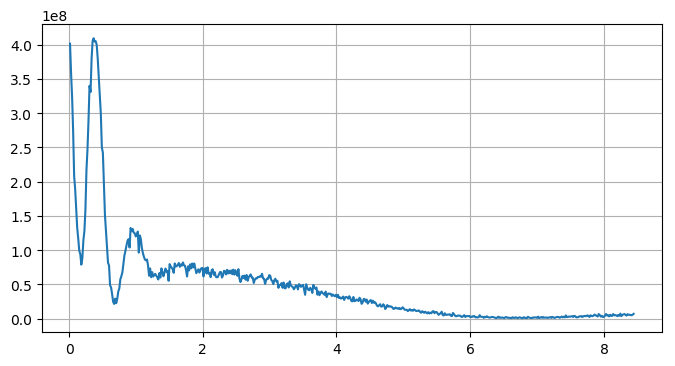

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f1d20586630>

In [47]:
figura=figure(figsize=(8,4))

grid()
plot(rangoomegas[1:550], poder[1:550])

In [43]:
fexe

1163-element Array{Complex{Float64},1}:
      -20034.1796875 + 2.5011104298755527e-12im
 -15493.396447357016 + 10890.281548234365im    
  -6265.172817181607 + 16883.849389117586im    
  3546.3454715033463 + 16209.361023739566im    
   9218.186348977539 + 11104.210239373926im    
   12976.45026890929 + 4566.232938160416im     
  12558.810497339713 - 1990.2345500783954im    
   9295.838430206572 - 6772.230560710836im     
   5096.664812705799 - 9535.815293074495im     
   701.9450712730395 - 9933.392039405617im     
 -3267.8439374741583 - 9138.09106653684im      
  -5787.247870105724 - 6740.111725088014im     
  -8032.016460721568 - 4847.966111613256im     
                     ⋮                         
  -8032.016460721567 + 4847.966111613256im     
 -5787.2478701057225 + 6740.111725088018im     
  -3267.843937474158 + 9138.091066536837im     
   701.9450712730409 + 9933.392039405615im     
   5096.664812705794 + 9535.815293074493im     
   9295.838430206566 + 6772.230560710837im     


In [49]:
?Dict

search: Dict IdDict WeakKeyDict AbstractDict redirect_stdin redirect_stdout



```
Dict([itr])
```

`Dict{K,V}()` constructs a hash table with keys of type `K` and values of type `V`. Keys are compared with [`isequal`](@ref) and hashed with [`hash`](@ref).

Given a single iterable argument, constructs a [`Dict`](@ref) whose key-value pairs are taken from 2-tuples `(key,value)` generated by the argument.

# Examples

```jldoctest
julia> Dict([("A", 1), ("B", 2)])
Dict{String,Int64} with 2 entries:
  "B" => 2
  "A" => 1
```

Alternatively, a sequence of pair arguments may be passed.

```jldoctest
julia> Dict("A"=>1, "B"=>2)
Dict{String,Int64} with 2 entries:
  "B" => 2
  "A" => 1
```
